In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

%matplotlib.inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (12,6)

UsageError: Line magic function `%matplotlib.inline` not found.


In [6]:
data = pd.read_csv('driver-data.csv')


In [7]:
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [9]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [10]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters= 2)
df_analyze = data.drop('id' , axis = 1)

In [14]:
kmeans.fit(df_analyze)

kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [15]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [16]:
pd.Series(kmeans.labels_).value_counts()

0    3200
1     800
dtype: int64

In [17]:
print(type(kmeans.labels_))
unique , counts = np.unique(kmeans.labels_ , return_counts = True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


C:\Users\Shubham\Anaconda3.1\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


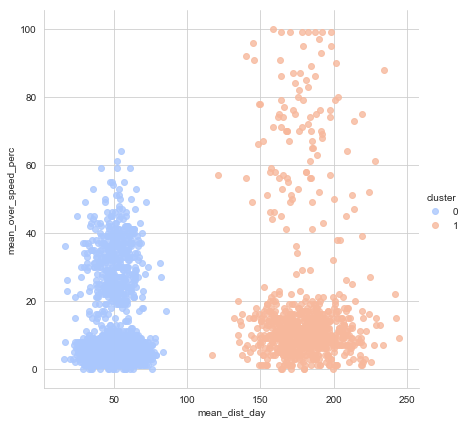

In [20]:
df_analyze['cluster']= kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)


In [21]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(data.drop('id',axis=1))
kmeans_4.fit(data.drop('id',axis=1))
print(kmeans_4.cluster_centers_)
unique , counts = np.unique(kmeans_4.labels_, return_counts = True)
kmeans_4.cluster_centers_
print(dict(zip(unique,counts)))

[[ 49.98428468   5.21441441]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.46127059  32.42823529]]
{0: 2775, 1: 696, 2: 104, 3: 425}


C:\Users\Shubham\Anaconda3.1\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


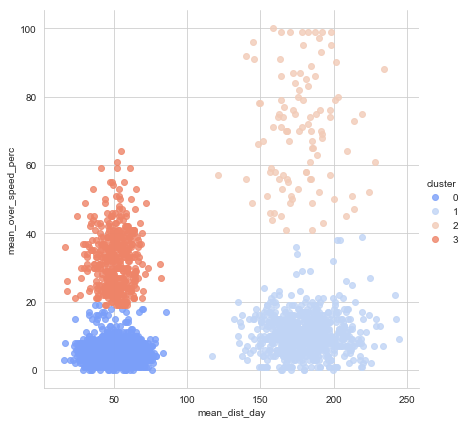

In [22]:
df_analyze['cluster']= kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)